In [4]:
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# Define the team name (e.g., 'Real Madrid')
team_name = 'Real Madrid'

In [3]:
# Connect to the SQLite database
conn = sqlite3.connect('european_database.sqlite')
cursor = conn.cursor()

# Execute an SQL query to retrieve relevant data for the specified team
cursor.execute('''
SELECT
    season,
    strftime('%Y-%m', Date) AS Month,
    SUM(CASE WHEN HomeTeam = ? THEN FTHG ELSE FTAG END) - SUM(CASE WHEN AwayTeam = ? THEN FTHG ELSE FTAG END) AS GoalDifference,
    SUM(CASE WHEN HomeTeam = ? AND FTR = 'H' THEN 3 WHEN AwayTeam = ? AND FTR = 'A' THEN 3 WHEN FTR = 'D' THEN 1 ELSE 0 END) AS TotalPoints
FROM
    matchs
WHERE
    (HomeTeam = ? OR AwayTeam = ?)
GROUP BY
    season, Month
ORDER BY
    season, Month
''', (team_name, team_name, team_name, team_name, team_name, team_name))

# Fetch the results
results = cursor.fetchall()
results

[(2006, '2005-08', 1.0, 3),
 (2006, '2005-09', 3.0, 6),
 (2006, '2005-10', 6.0, 9),
 (2006, '2005-11', -2.0, 4),
 (2006, '2005-12', 2.0, 7),
 (2006, '2006-01', 5.0, 10),
 (2006, '2006-02', 8.0, 9),
 (2006, '2006-03', 5.0, 9),
 (2006, '2006-04', 2.0, 9),
 (2006, '2006-05', 0.0, 4),
 (2007, '2006-08', 0.0, 1),
 (2007, '2006-09', 6.0, 9),
 (2007, '2006-10', 3.0, 7),
 (2007, '2006-11', 5.0, 9),
 (2007, '2006-12', -2.0, 6),
 (2007, '2007-01', -1.0, 6),
 (2007, '2007-02', 0.0, 5),
 (2007, '2007-03', 2.0, 5),
 (2007, '2007-04', 6.0, 12),
 (2007, '2007-05', 5.0, 12),
 (2007, '2007-06', 2.0, 4),
 (2008, '2007-08', 1.0, 3),
 (2008, '2007-09', 10.0, 13),
 (2008, '2007-10', 7.0, 9),
 (2008, '2007-11', -1.0, 4),
 (2008, '2007-12', 6.0, 12),
 (2008, '2008-01', 7.0, 12),
 (2008, '2008-02', 3.0, 3),
 (2008, '2008-03', 2.0, 9),
 (2008, '2008-04', 6.0, 10),
 (2008, '2008-05', 7.0, 10),
 (2009, '2008-08', -1.0, 0),
 (2009, '2008-09', 10.0, 12),
 (2009, '2008-10', 2.0, 7),
 (2009, '2008-11', -1.0, 7),
 (2

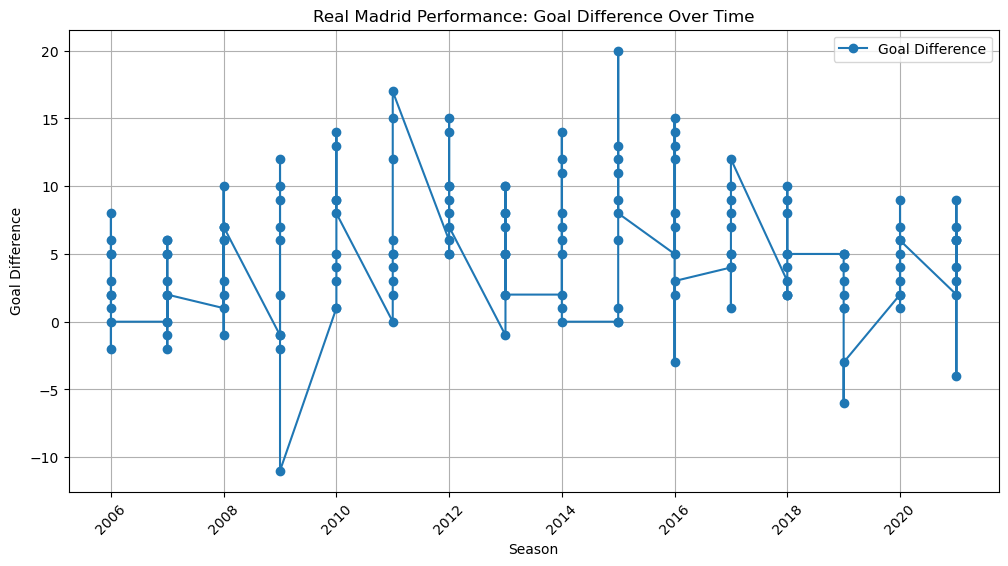

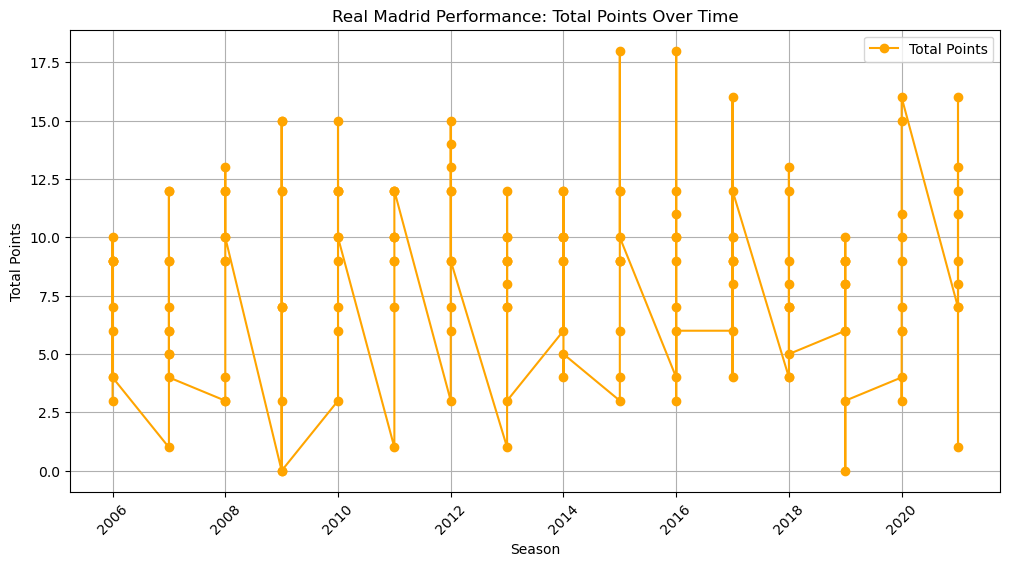

In [5]:
# Extract season, month, and performance metrics from the results
seasons = [row[0] for row in results]
months = [row[1] for row in results]
goal_differences = [row[2] for row in results]
total_points = [row[3] for row in results]

# Create line charts to visualize the team's performance metrics over time
plt.figure(figsize=(12, 6))
plt.plot(seasons, goal_differences, marker='o', linestyle='-', label='Goal Difference')
plt.xlabel('Season')
plt.ylabel('Goal Difference')
plt.title(f'{team_name} Performance: Goal Difference Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(seasons, total_points, marker='o', linestyle='-', label='Total Points', color='orange')
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.title(f'{team_name} Performance: Total Points Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()